<a href="https://colab.research.google.com/github/aayRJ23/VisualCryptoGraphy-Sender-s-Code-MajorProject/blob/main/VisualCrypto_Sender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL SENDER'S CODE

Import all dependencies

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

Function to upload image

In [2]:
def upload_image():
    uploaded = files.upload()
    for file_name in uploaded.keys():
        image = cv2.imdecode(np.frombuffer(uploaded[file_name], np.uint8), cv2.IMREAD_GRAYSCALE)
        return image, file_name

Function to convert image to black and white

In [3]:
def convert_to_bw(image):
    _, bw_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return bw_image

Function to embed text into the image

In [4]:
def embed_text_to_image(image, text):
    # Convert the secret text to binary, adding a delimiter at the end
    binary_text = ''.join(format(ord(char), '08b') for char in text) + '00000000'

    # Flatten the image to process pixel values
    flat_image = image.flatten()

    # Ensure the image can hold the secret text
    if len(flat_image) < len(binary_text):
        raise ValueError("Image size is too small to embed the secret text.")

    # Embed the secret text into the image
    for i in range(len(binary_text)):
        # Convert the current pixel value to binary
        pixel_binary = format(flat_image[i], '08b')

        # Modify the least significant bit of the pixel to represent the secret text
        modified_pixel_binary = pixel_binary[:-1] + binary_text[i]

        # Convert the modified pixel binary back to integer and assign to the pixel
        flat_image[i] = int(modified_pixel_binary, 2)

    # Reshape the flat image back to its original shape
    return flat_image.reshape(image.shape)


Function to divide the image into quadrants and embed text

In [5]:
# Function to divide the image into quadrants and embed text
def divide_and_embed(image, text):
    height, width = image.shape
    quad_height = height // 2
    quad_width = width // 2

    # Embed text into the image
    embedded_image = embed_text_to_image(image, text)

    # Display the image with embedded text
    plt.imshow(embedded_image, cmap='gray')
    plt.title('Image with Embedded Text')
    plt.axis('off')
    plt.show()

    # Divide the image into 4 quadrants
    quadrants = []
    for i in range(2):
        for j in range(2):
            quadrant = embedded_image[i * quad_height:(i + 1) * quad_height, j * quad_width:(j + 1) * quad_width]
            quadrants.append(quadrant)

    # Display and download embedded quadrants
    for i, quadrant in enumerate(quadrants):
        plt.imshow(quadrant, cmap='gray')
        plt.title(f'Embedded Quadrant {i+1}')
        plt.axis('off')
        plt.show()
        cv2.imwrite(f'embedded_quadrant_{i+1}.png', quadrant)

**Main Script Execution**

Please upload an image (jpg format).


Saving sunset.jpg to sunset.jpg


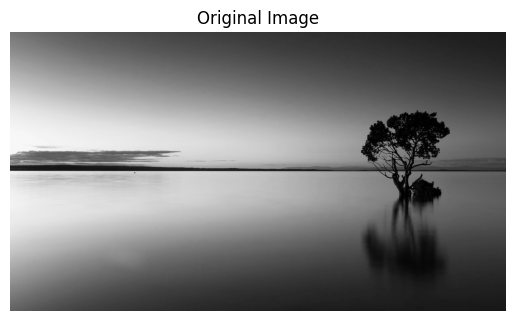

Enter the secret message to hide in the image: HELLO EVERYONE ? HOW ARE YOU ALL ?


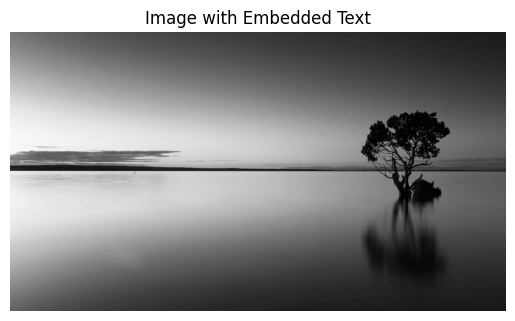

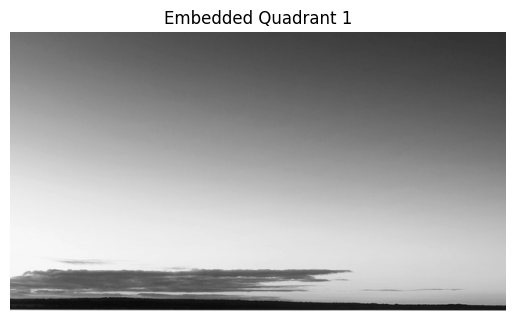

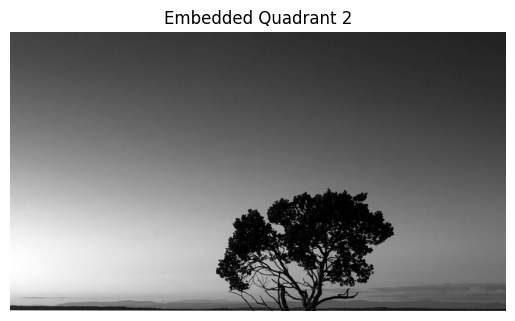

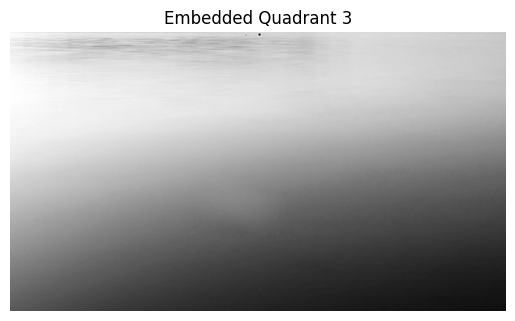

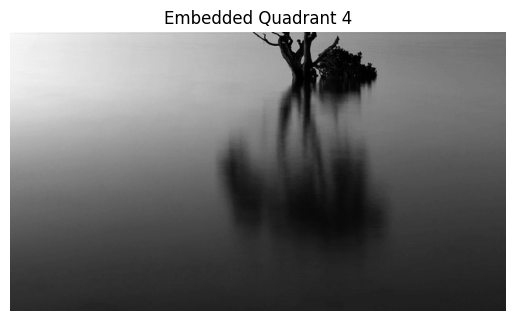

In [6]:
print("Please upload an image (jpg format).")
image, _ = upload_image()

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Prompt for Secret Message
text_message = input("Enter the secret message to hide in the image: ")

# Embed text into the image and divide into quadrants
divide_and_embed(image, text_message)